<h1 align="center">PNICER demonstration notebook</h1> 


## Import stuff

**PNICER** main dependencies are *numpy* and *scikit-learn*. In addition also *matplotlib*, *astropy*, and *wcsaxes* are required for extended functionality

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from pnicer import Magnitudes

# Set notebook stuff
%matplotlib inline

## Define file paths and load data

The implementation requires the data to be parsed in lists of arrays. Here we load magnitudes and errors for both the science and the controlf field.

In [13]:
# ----------------------------------------------------------------------
# Load catalog data
skip = 10
science_dummy = fits.open(science_path)[1].data
control_dummy = fits.open(control_path)[1].data

science_glon = science_dummy["GLON"][::skip]
science_glat = science_dummy["GLAT"][::skip]

control_glon = control_dummy["GLON"][::skip]
control_glat = control_dummy["GLAT"][::skip]

features_names = ["J", "H", "Ks", "IRAC1", "IRAC2"]
errors_names = ["J_err", "H_err", "Ks_err", "IRAC1_err", "IRAC2_err"]
features_extinction = [2.5, 1.55, 1.0, 0.636, 0.54]

n_features = 5

# Photometry
science_data = [science_dummy[n][::skip] for n in features_names[:n_features]]
control_data = [control_dummy[n][::skip] for n in features_names[:n_features]]

# Measurement errors
science_error = [science_dummy[n][::skip] for n in errors_names[:n_features]]
control_error = [control_dummy[n][::skip] for n in errors_names[:n_features]]
features_extinction = features_extinction[:n_features]
features_names = features_names[:n_features]

## Initialize data

The **PNICER** implementation includes both the new probabilistic approach as well as **NICER**. The data can be initialzed as a *Magnitude* instance. Alternativley also a *Colors* instance can be used. A *Colors* instance can also be created from a *Magnitudes* instance which calcualtes consecutive colors for the input data.

In [14]:
science = Magnitudes(mag=science_data, err=science_error, extvec=features_extinction,
                     lon=science_glon, lat=science_glat, names=features_names)
control = Magnitudes(mag=control_data, err=control_error, extvec=features_extinction,
                     lon=control_glon, lat=control_glat, names=features_names)

## Performance evaluation

In [16]:
science_color = science.mag2color()
control_color = control.mag2color()
def run_nicer():
    science.nicer(control=control)

def run_pnicer():
    science_color.pnicer(control=control_color)

%timeit -r 1 run_nicer()
%timeit -r 1 run_pnicer()


1 loops, best of 1: 508 ms per loop
1 loops, best of 1: 1.95 s per loop


## Plot stuff

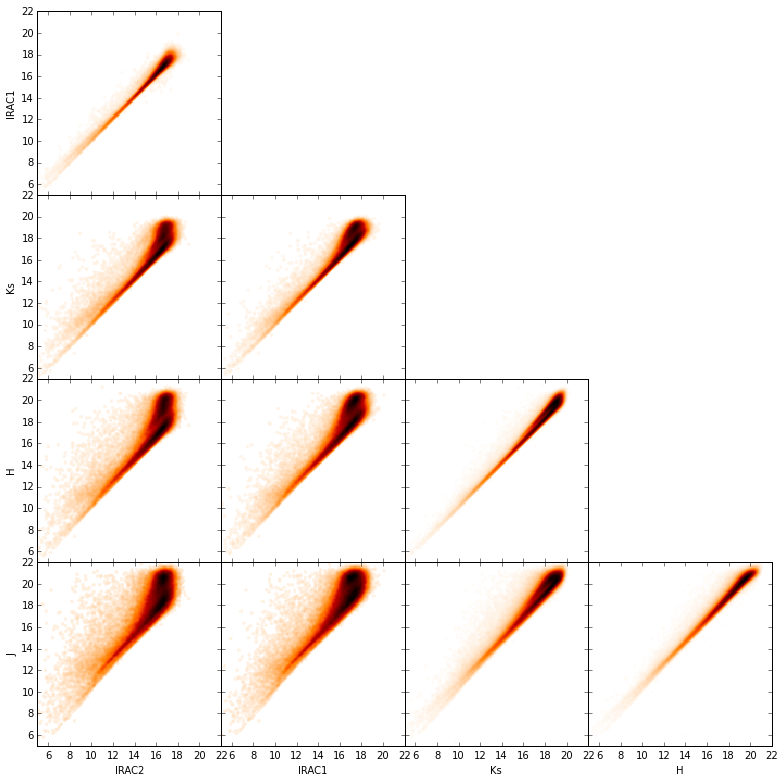

In [14]:
science.plot_combinations_kde()

We can do the same with colors

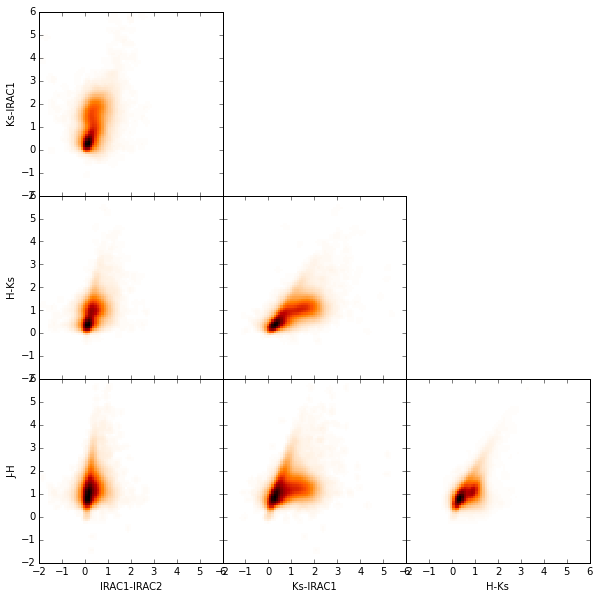

In [19]:
science.mag2color().plot_combinations_kde()

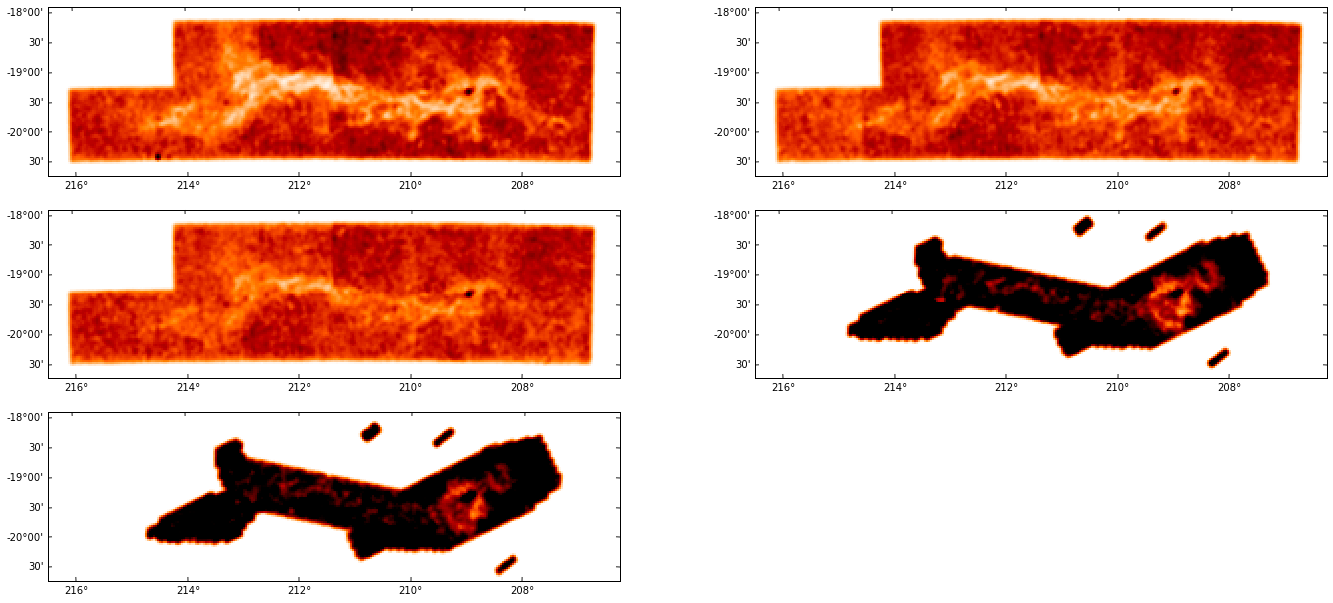

In [17]:
science.plot_spatial_kde(frame="galactic", pixsize=2/60, skip=1)

## Running the software

Now we run PNICER and NICER on the data to obtain extinctions for each source.

In [20]:
ext_pnicer = science.pnicer(control=control, sampling=2, use_color=True)
ext_nicer = science.nicer(control=control, all_features=False)

We can save the data as fits tables

In [23]:
ext_pnicer.save_fits(path="/Users/Antares/Desktop/Orion_pnicer.fits")
ext_nicer.save_fits(path="/Users/Antares/Desktop/Orion_nicer.fits")

## Extinction map

With the calculated extinction for each source, we can make an extinction map

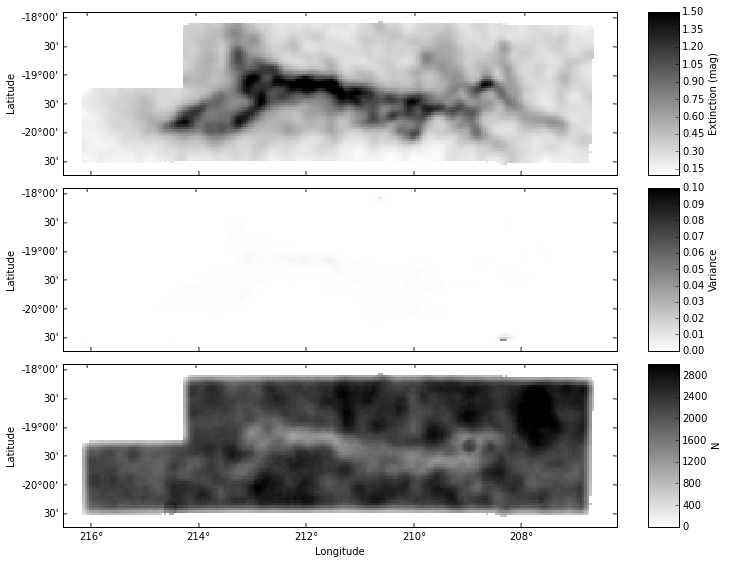

In [ ]:
emap_nicer = ext_nicer.build_map(bandwidth=5/60, method="gaussian", sampling=2, nicest=False)
emap_nicer.plot_map(figsize=10)

In [ ]:
emap_nicer = ext_nicer.build_map(bandwidth=5/60, method="gaussian", sampling=2, nicest=False)
emap_nicer.plot_map(figsize=10)